-0.5425355037691828


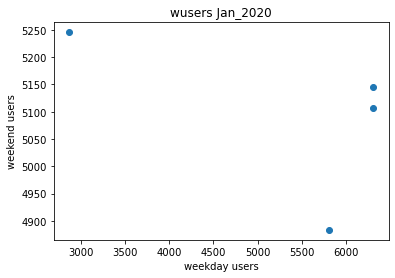

0.9700397604649387


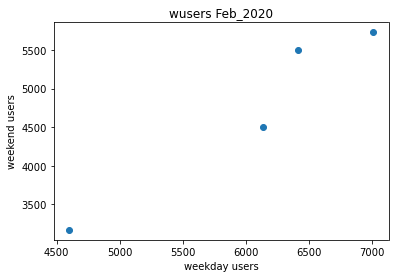

0.8135470020670982


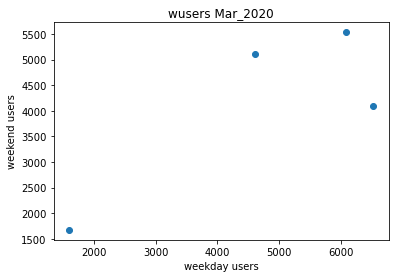

0.4976032484779519


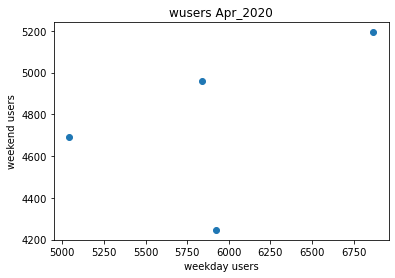

0.6632830951430931


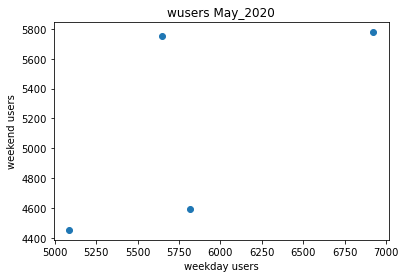

0.8125649760037538


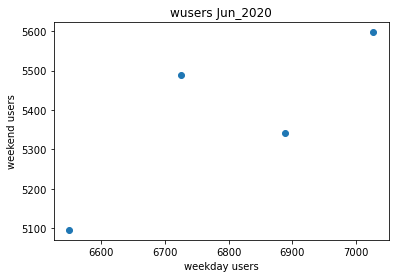

0.4305433190797852


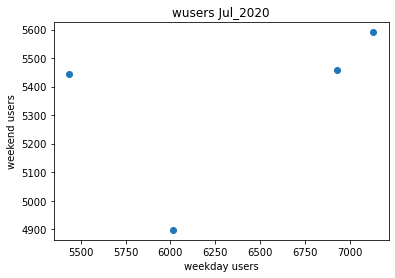

0.5251014663443951


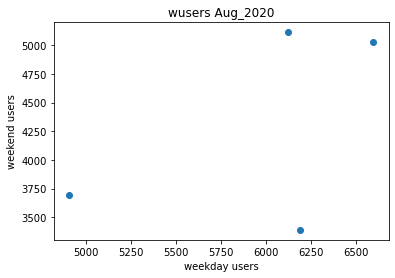

-0.4514497194486498


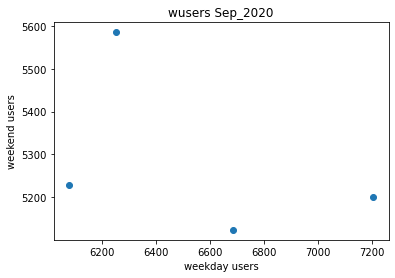

0.8550261021935958


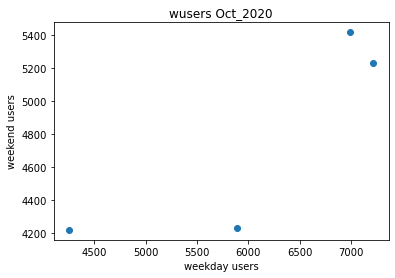

0.9924488620306084


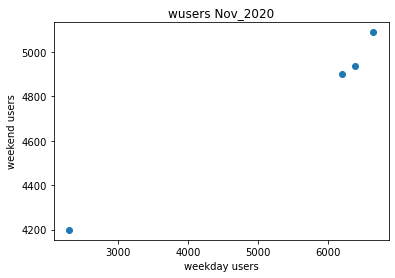

0.24078740128950402


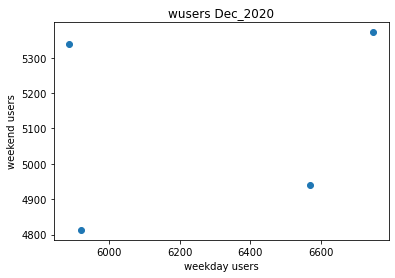

-0.9335403135593383


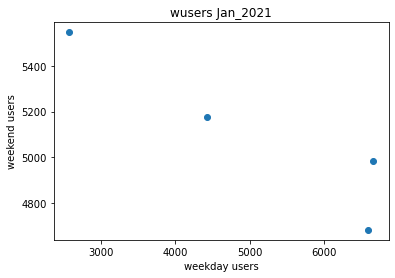

-0.7900914517249162


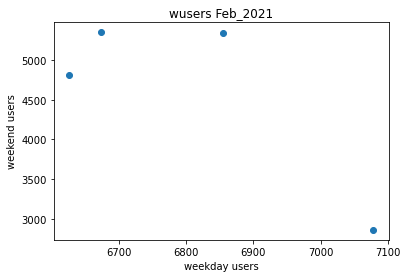

0.997760319425411


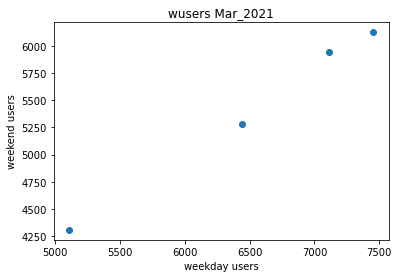

0.7750164165411426


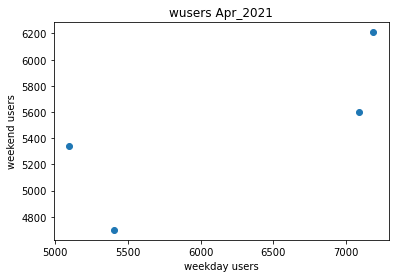

0.7353854427062394


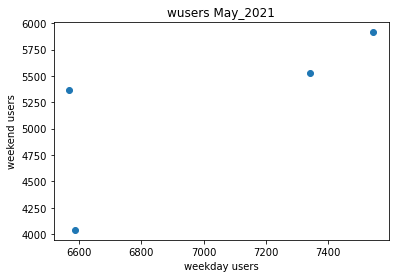

0.8190850590110734


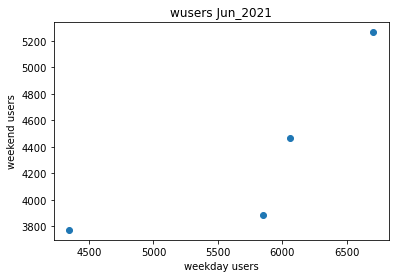

0.08340466577444032


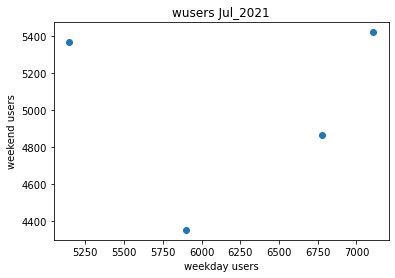

0.6607466932465221


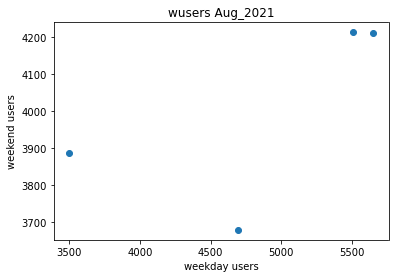

0.8446039417018693


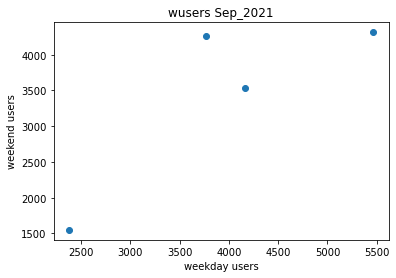

0.3229750297497685


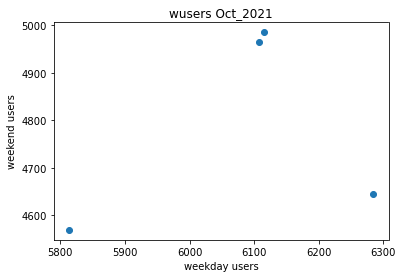

0.7197159971356393


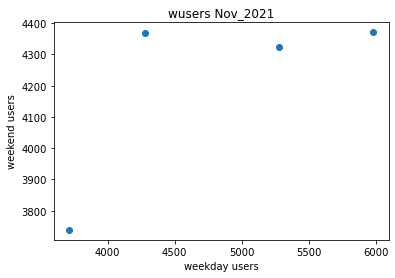

0.970020730916325


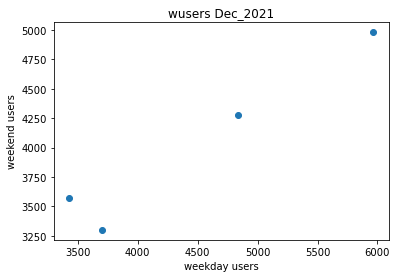

-0.7474683049313063


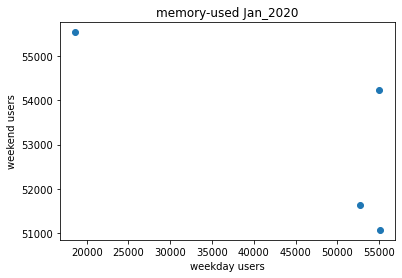

0.9927841520355956


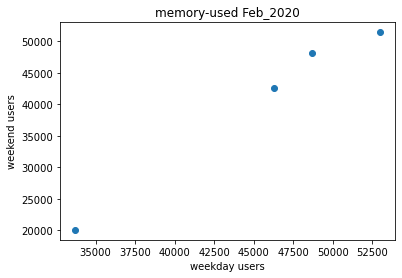

0.783538541424608


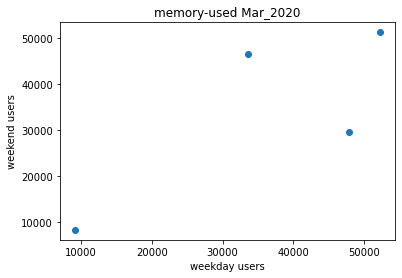

0.5300061094104108


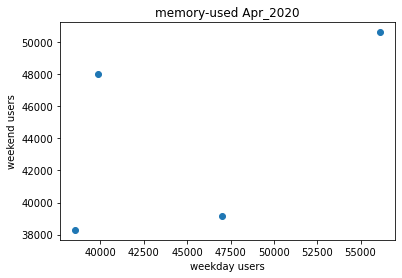

0.6404605340198447


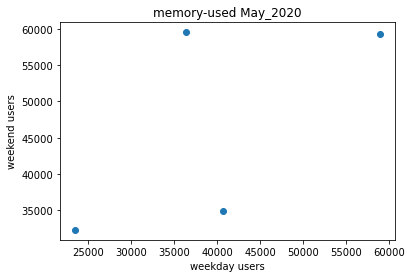

0.011673779554342898


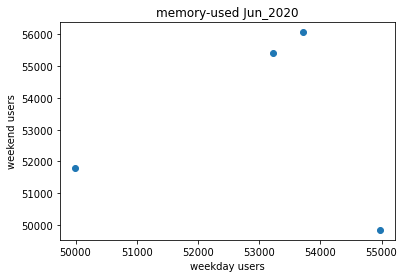

0.3423560568531716


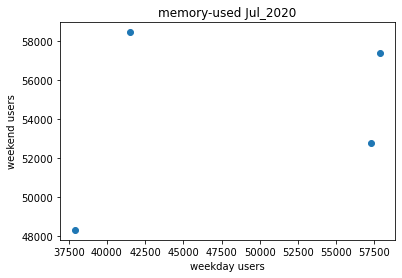

0.2408073392327661


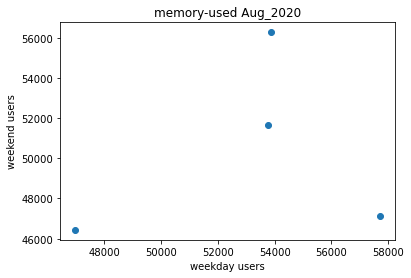

0.5512948427552141


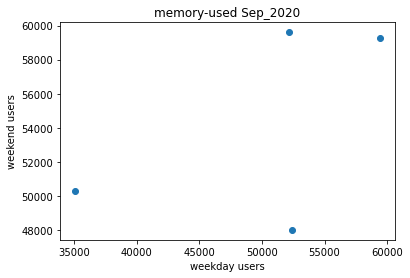

0.9396582662892229


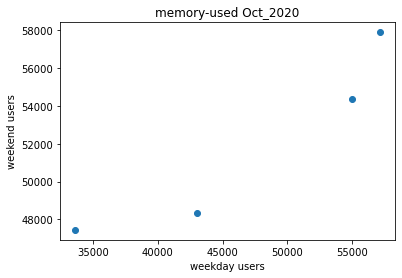

0.9990829209315372


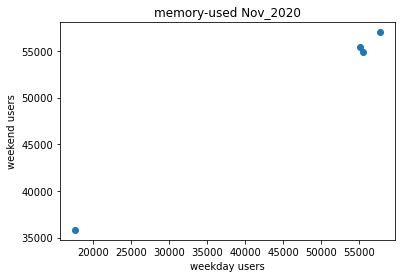

0.9086621067328705


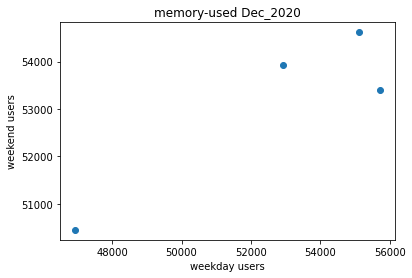

-0.9550498217202279


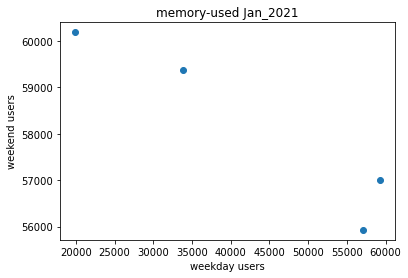

-0.38340603651323163


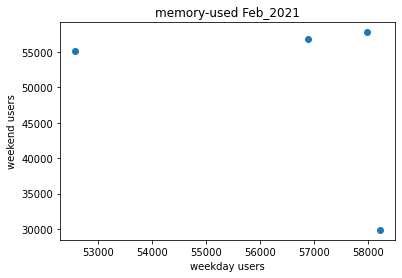

0.9993628921989063


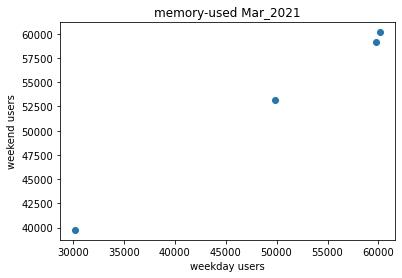

0.2587060387890459


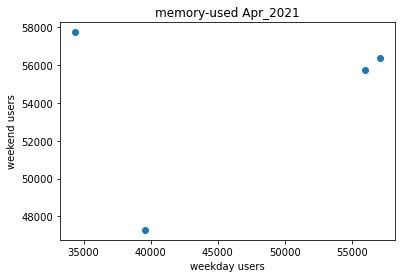

0.9799413335514058


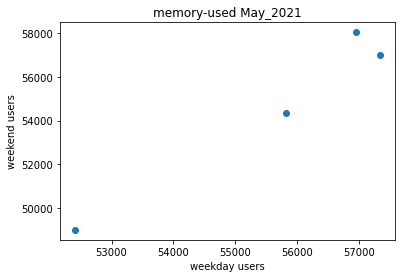

0.6160567462690593


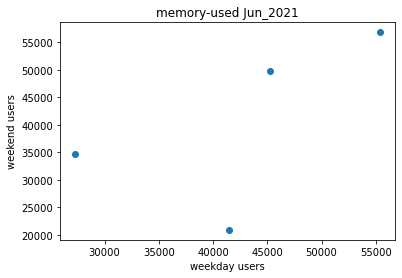

-0.6546593755310871


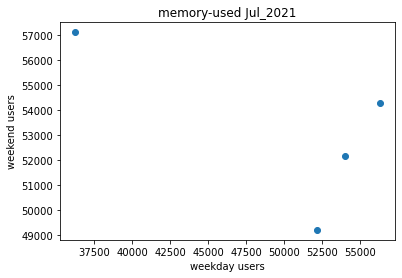

0.348108834925073


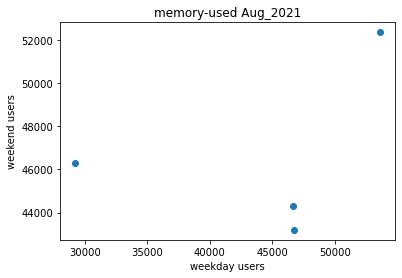

0.864379058061073


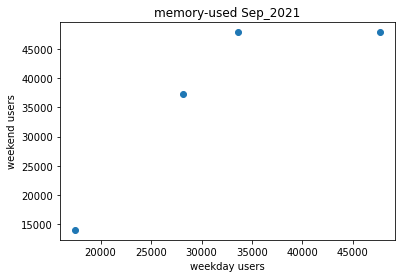

0.2915235528394143


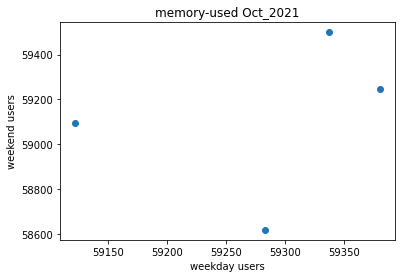

0.7566673134594181


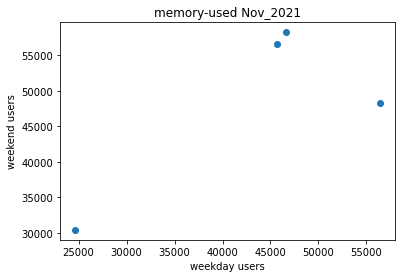

0.9838696031692181


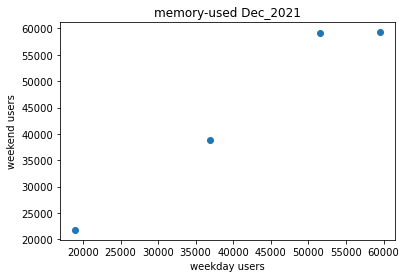

-0.515673603290292


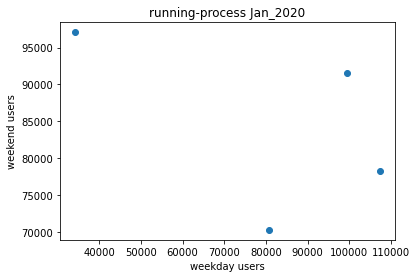

0.9949120294263644


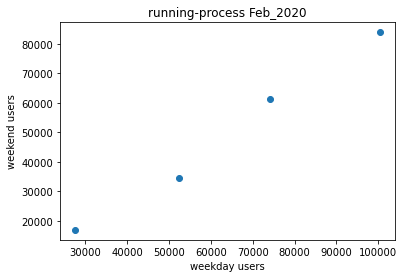

0.8332670363560943


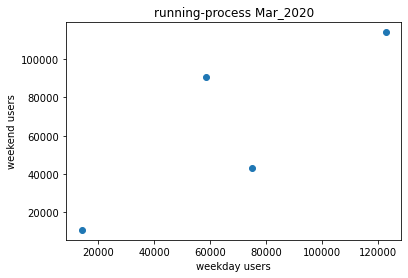

0.9826635023738397


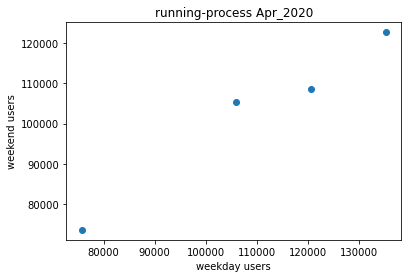

0.8774165827054116


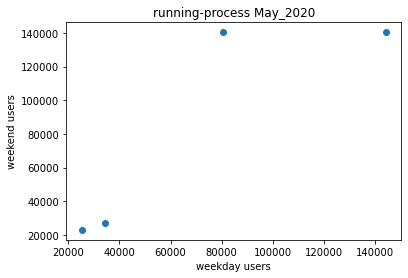

0.9894824068402371


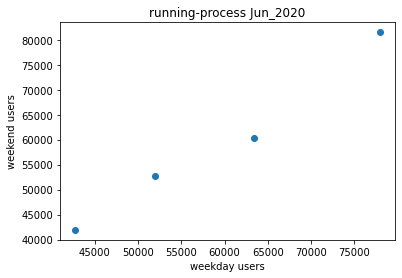

-0.5834353794053083


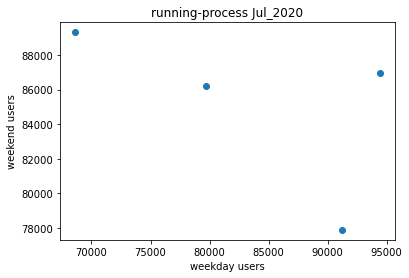

0.07766859246373158


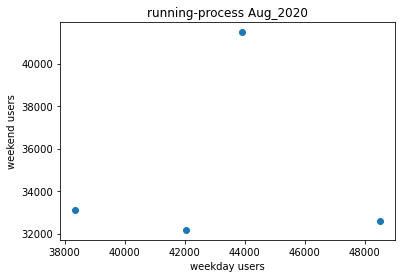

0.552986461421883


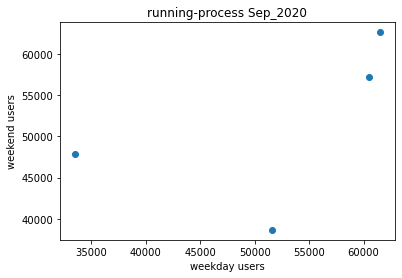

0.8989547480635909


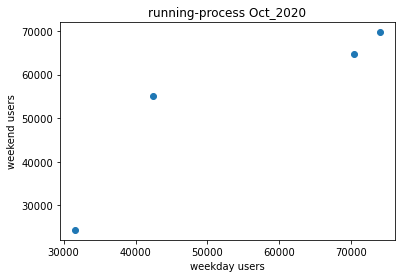

0.888211763844693


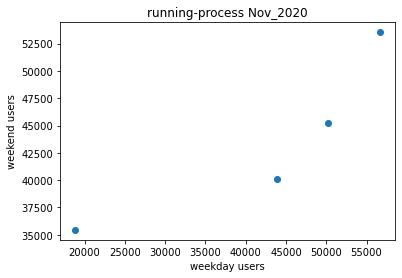

0.9961636105251949


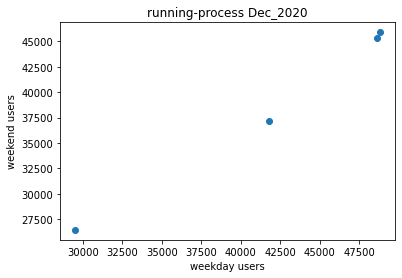

-0.9547742320104444


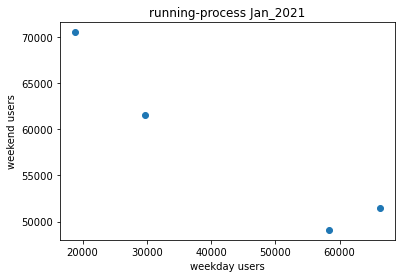

-0.5129845140875336


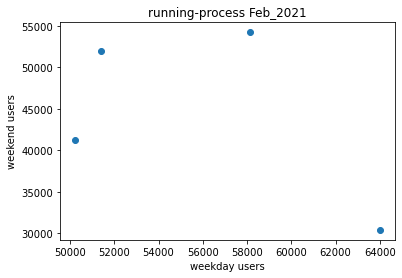

0.9948072899390769


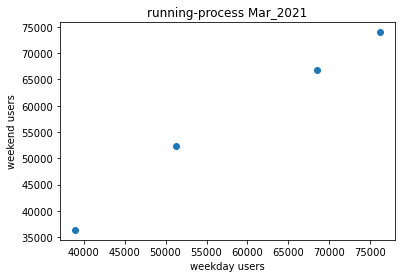

0.6092263355955427


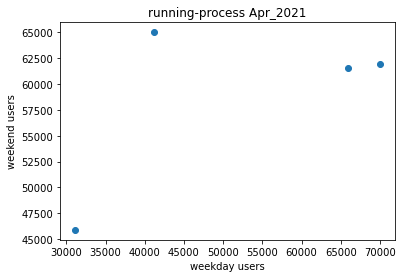

0.9400800598473447


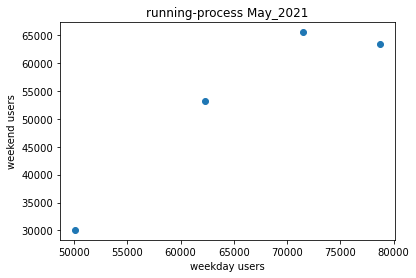

0.01652122218536914


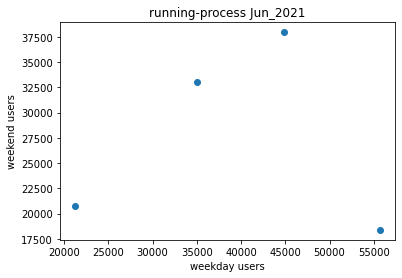

-0.10025089734441928


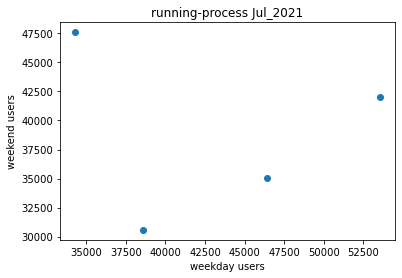

0.04450428196751831


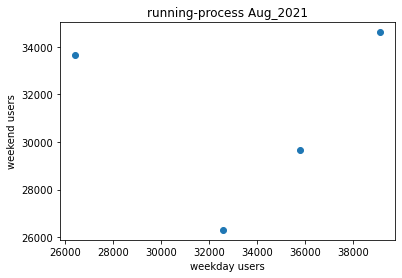

0.8332446271514344


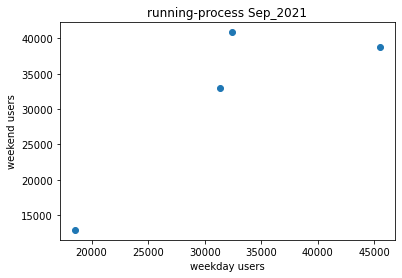

0.989938096633822


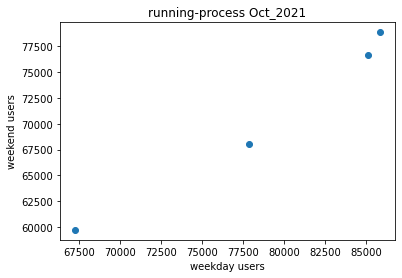

0.963025692183411


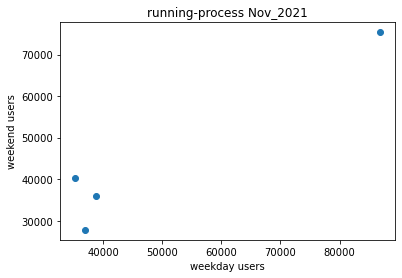

0.9830365471234498


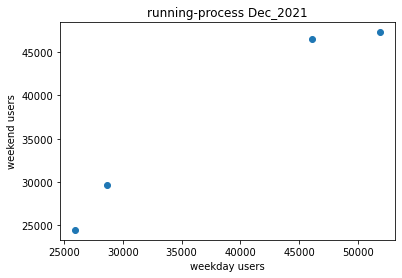

In [10]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
file = '../Data/weekends_holidays - weekends_holidays.csv'
df = pd.read_csv(file)
lis = []
for a,b in df.iterrows():
    date = b[0].split('-')
    months = {'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}
    date = months[date[1]]+date[0]+'_'+date[2]
    lis.append(date)
    




csv_path = '../SMC-Data_Challenge/csv_files/'
csvs = ['Jan2020','Feb2020','Mar2020','Apr2020','May2020','Jun2020',
        'Jul2020','Aug2020','Sep2020','Oct2020','Nov2020','Dec2020',
        'Jan2021','Feb2021','Mar2021','Apr2021','May2021','Jun2021',
        'Jul2021','Aug2021','Sep2021','Oct2021','Nov2021','Dec2021']

def finding_correlation(arg):
    for i in csvs:
        df  = pd.read_csv(csv_path+i+'.csv',usecols=['date-hour','login-node','wusers','memory-used','running-process'])
        new_df = df.sort_values(by=['date-hour','login-node'])
    
        month = new_df.iloc[-1][0][0:3]
        year = new_df.iloc[-1][0][5:10]
        end = int(new_df.iloc[-1][0][3:5])
        x = []
        y = []
        wu = []
        weku = []
        for j in range(1,end):
            if j <= 9:
                date = month+'0'+ str(j) + year
            else:
                date = month + str(j) + year
        
            abc = new_df[new_df['date-hour'].str.contains(date)]
        
            if date in lis and abc[arg].sum() != 0:
                # if the sum is 0 that means the column of that date is not present in that dataframe.
                # missing files.
                weku.append(abc[arg].sum())
            if date not in lis and abc[arg].sum() != 0:
                wu.append(abc[arg].sum())
        
    
        for k in range(4):
            # a month has 4 weeks
            x.append(sum(wu[5*k:k*5+5])/5)
            y.append(sum(weku[2*k:k*2+2])/2)
            # created 2 axis x for weekday and y for weekends.
            a = np.array(x,dtype=np.float64)
        
            b = np.array(y,dtype=np.float64)
            plt.title(arg+" "+month+year)
            plt.xlabel('weekday users')
            plt.ylabel('weekend users')
        
        

        corr = np.corrcoef(a, b)[0,1]
        print(corr)
        # printing and plotting the correlation for every month.
        plt.scatter(x,y)
        plt.show()
relation = ['wusers','memory-used','running-process']

for i in relation:
    finding_correlation(i)
